In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-darkgrid")

### O treinamento de um modelo de regressão linear

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

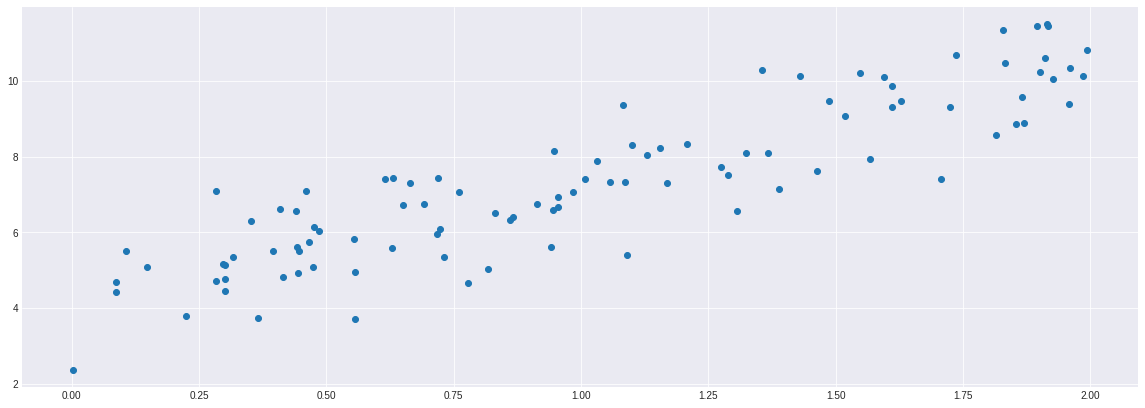

In [3]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

In [4]:
x_b = np.c_[np.ones((100, 1)), x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
theta

array([[4.07721862],
       [3.19311312]])

In [6]:
y_hat = theta[0] + x * theta[1]

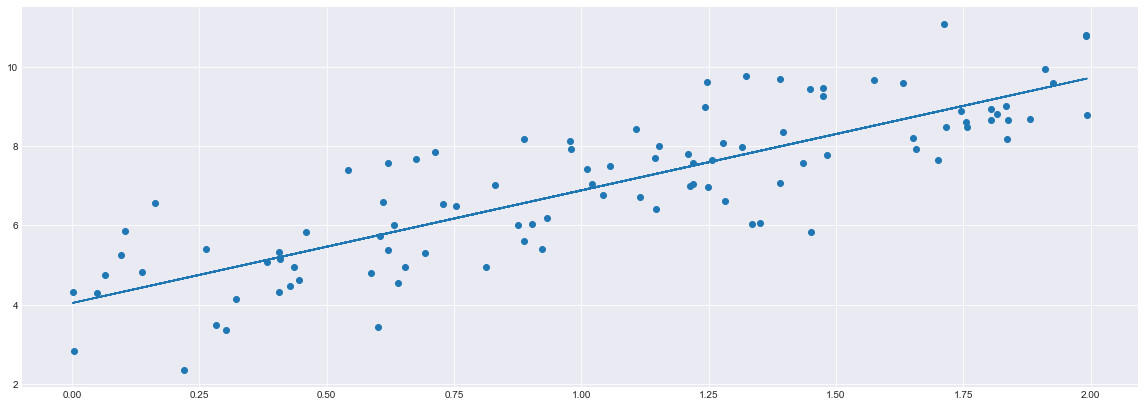

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat)
plt.scatter(x, y)

### Regressão linear no sklearn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07721862]), array([[3.19311312]]))

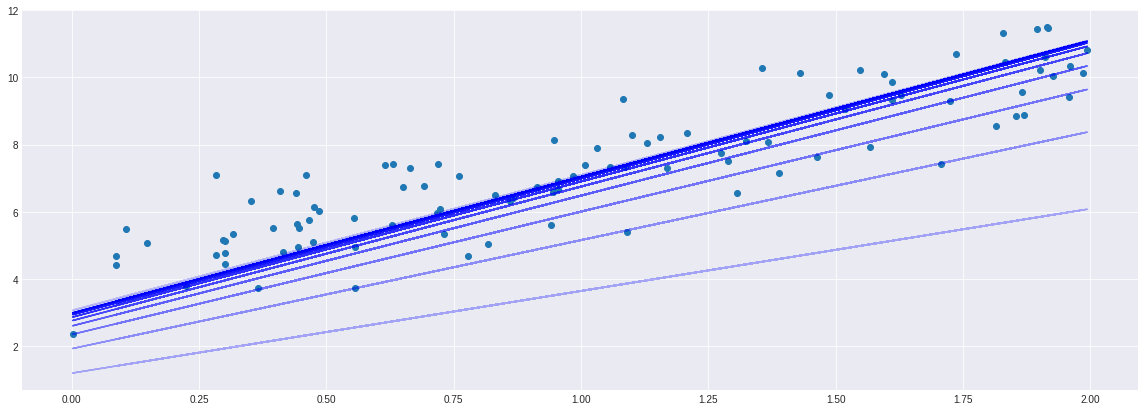

In [8]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations, color="blue")

## Batch Gradient Descent

In [9]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

Text(0.5, 1.0, 'Eta: 0.1')

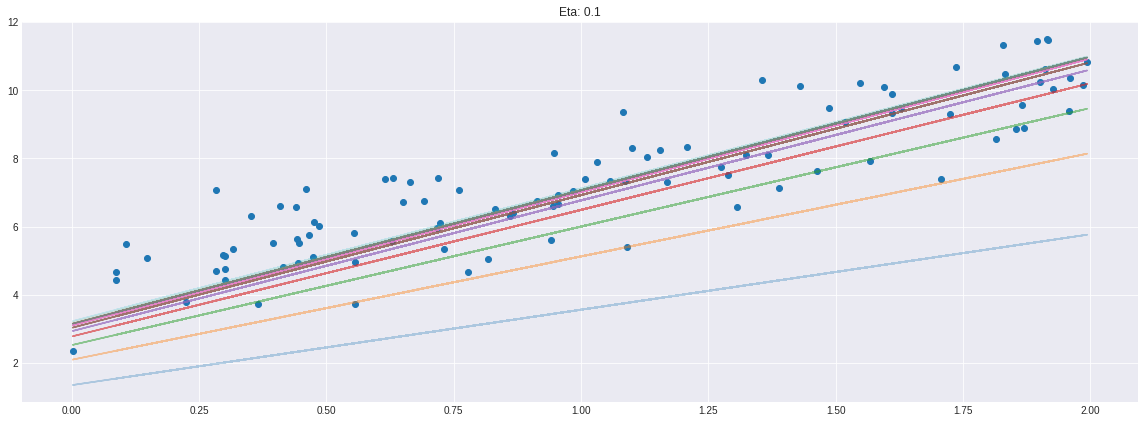

In [10]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.01')

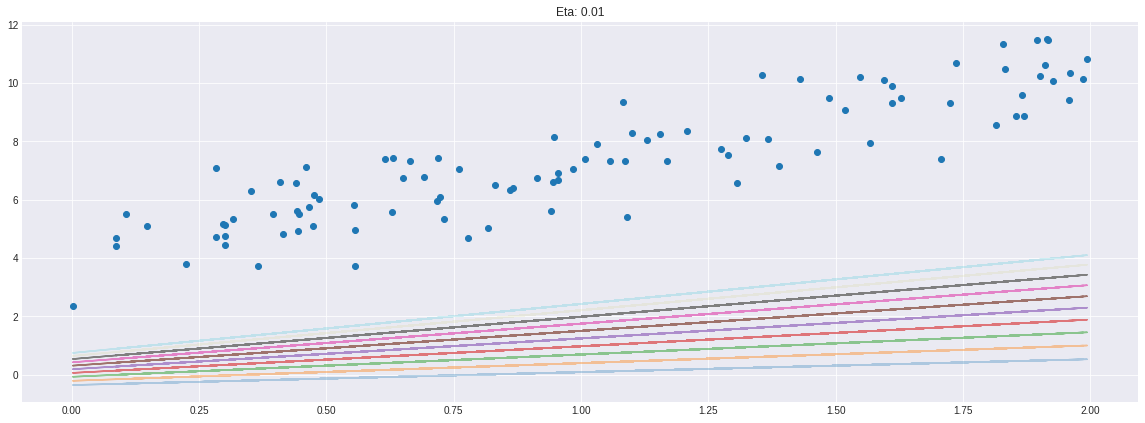

In [11]:
eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.5')

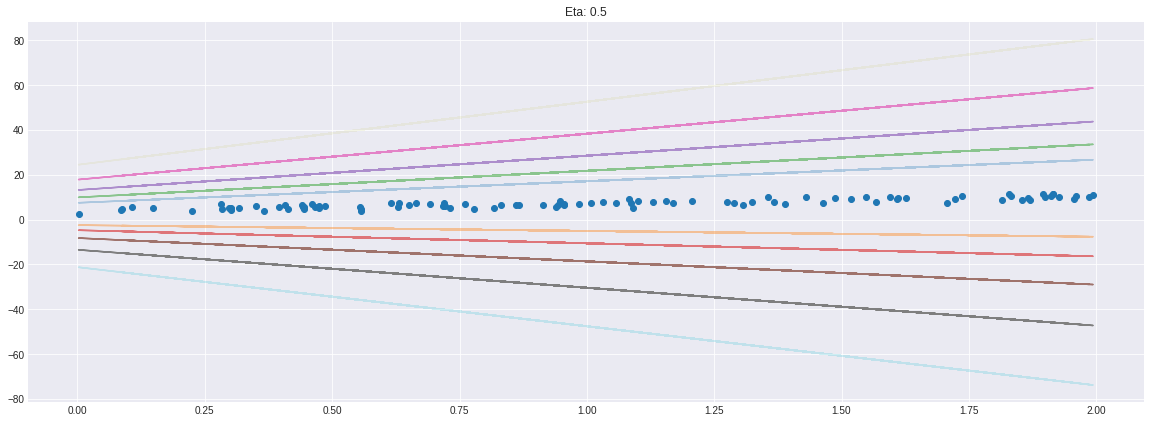

In [12]:
eta = 0.5  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

### Regressão polinomial

In [13]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

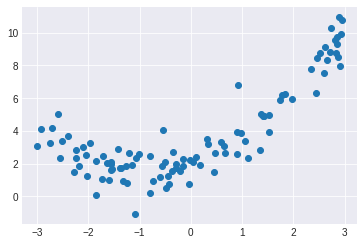

In [14]:
plt.scatter(x, y)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [16]:
x_poly[0]

array([-1.0107071 ,  1.02152884])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04538007]), array([[1.02217531, 0.55786436]]))

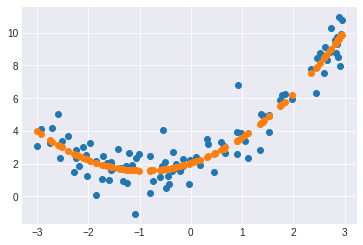

In [18]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

### O que acontece se a complexidade do modelo for aumentada desnecessariamente?

(-4.0, 4.0)

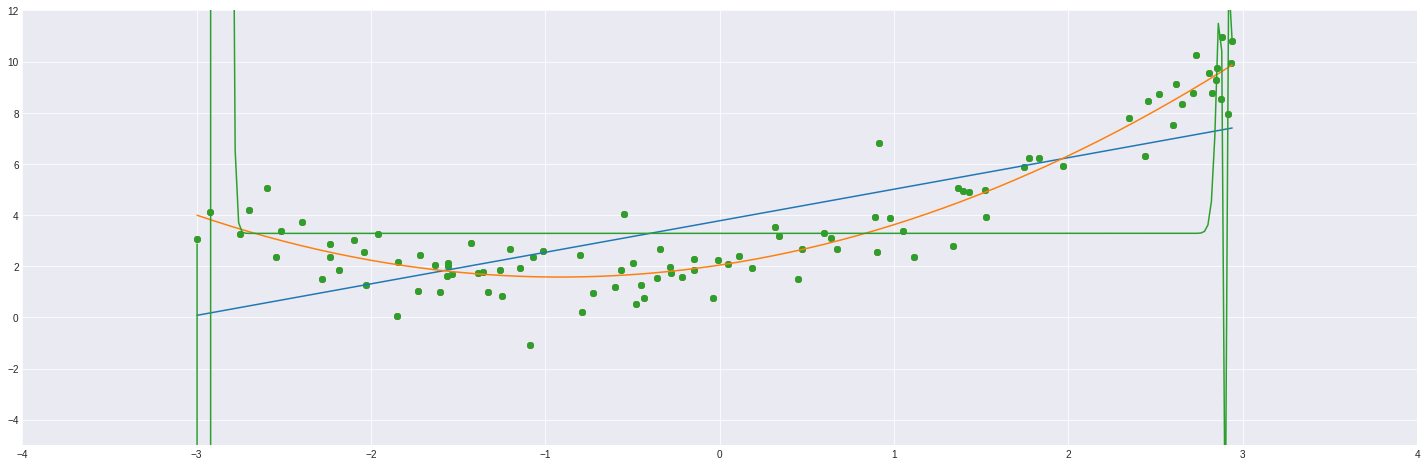

In [19]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

### Regressão Logística

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [23]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)

<ipython-input-23-5cdd22ded103>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

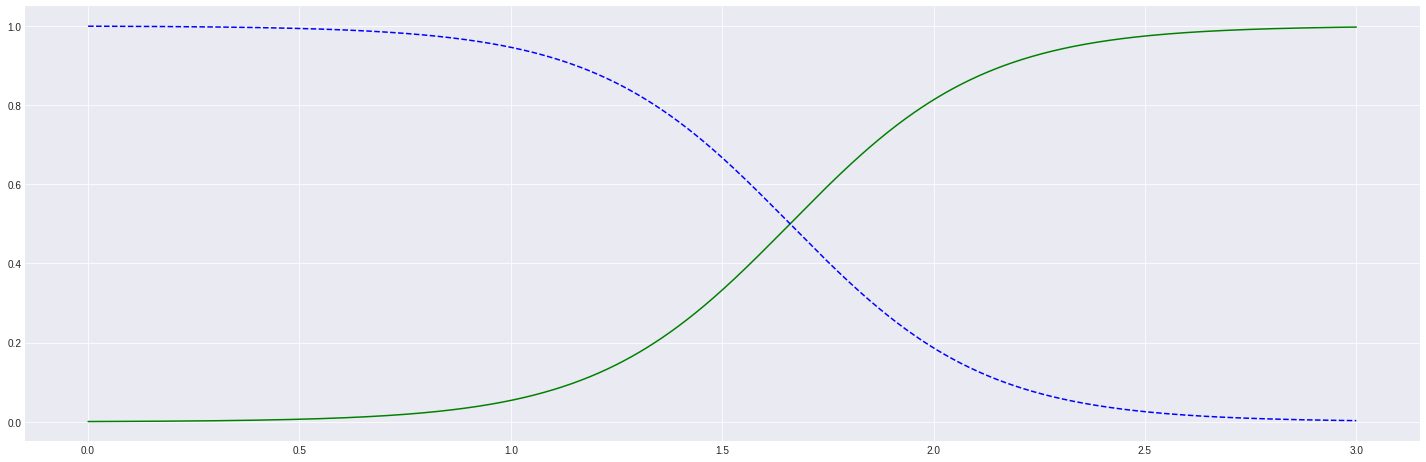

In [32]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")